In [1]:
from datetime import datetime
import statistics 

def random_faces(G):
    """
        G is a simple graph with no loop. 
        We create a set of halfedges, indexed by 1, ..., N = 2*G.num_edges().
        Then we generate the permutationo alpha and random sigma.
        And we return phi. 
        Then we can ask for 
         phi.cycle_type()
         or
         phi.cycle_tuples()
    """

    E1 = G.edges(labels=None)
    E2 = [(y,x) for (x,y) in E1]
    H = [None] + E1 + E2
    N = len(H)-1


    alpha=Permutation([(i,i+len(E1)) for i in range(1,len(E1)+1)])

    sigma = Permutation(
      [tuple(Permutations([H.index((v,x)) for x in G.neighbor_iterator(v)]).random_element())
      for v in G.vertices()])

    phi=alpha*sigma
    return phi

def sample_number_of_faces(G,samples=10):
    return [len(random_faces(G).cycle_type()) for _ in range(samples)]

    

def exp_size(L):
    return sum(L)/len(L)

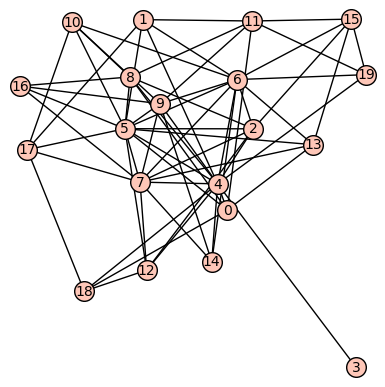

In [2]:
graphs.RandomBarabasiAlbert(20,4).show()

In [3]:
sizes = [3,6,12]
Grid = {}
List = {}
for s in sizes:
    Grid[s] = graphs.PathGraph(s).cartesian_product(graphs.PathGraph(s))
    
P10 = graphs.PathGraph(10)
P20 = graphs.PathGraph(20)


Pt = graphs.PetersenGraph()

Grid10 = P10.cartesian_product(P10)
Grid20 = P20.cartesian_product(P20)

In [273]:
Grid

{3: Graph on 9 vertices, 6: Graph on 36 vertices, 12: Graph on 144 vertices}

In [4]:
L_Pt = sample_number_of_faces(Pt, samples=1000)

histogram(L_Pt).show()
exp_size(L_Pt)

2.452

In [6]:
uniq(L_Pt)

<ipython-input-6-ab1f353fa975>:1: DeprecationWarning: the output of uniq(X) being sorted is deprecated; use sorted(set(X)) instead if you want sorted output
See https://trac.sagemath.org/27014 for details.
  uniq(L_Pt)


[1, 3, 5]

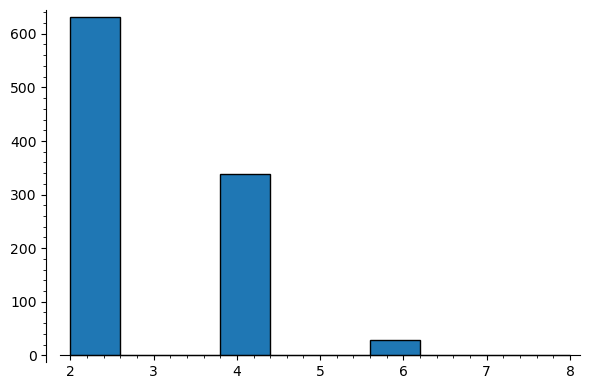

2.796

In [10]:
Fl = graphs.FlowerSnark()
L_Fl = sample_number_of_faces(Fl, samples=1000)

histogram(L_Fl).show()
exp_size(L_Fl)

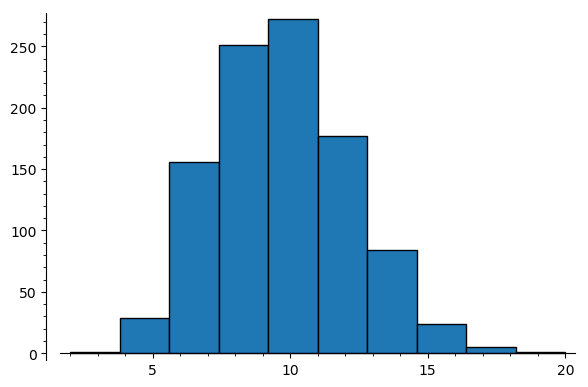

CPU times: user 35.8 s, sys: 75.7 ms, total: 35.9 s
Wall time: 36.8 s


In [269]:
%%time
L10 = sample_number_of_faces(Grid10, samples=1000)

histogram(L10).show()
print(exp_size(L10))

In [270]:
%%time
L20 = sample_number_of_faces(Grid20, samples=1000)

histogram(L20).show()
print(exp_size(L20))

KeyboardInterrupt: 

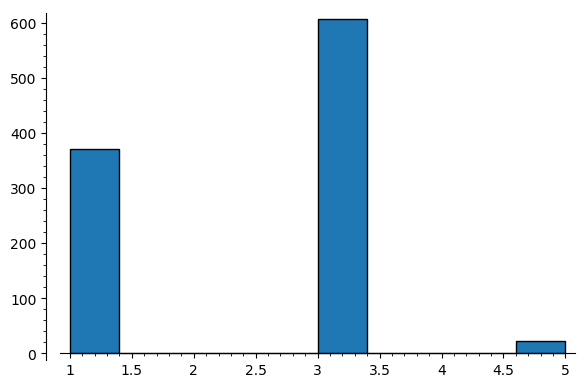

2.304
CPU times: user 710 ms, sys: 0 ns, total: 710 ms
Wall time: 715 ms


In [278]:
%%time
s=3
L[s] = sample_number_of_faces(Grid[s], samples=1000)

histogram(L[s]).show()
print(exp_size(L[s]))

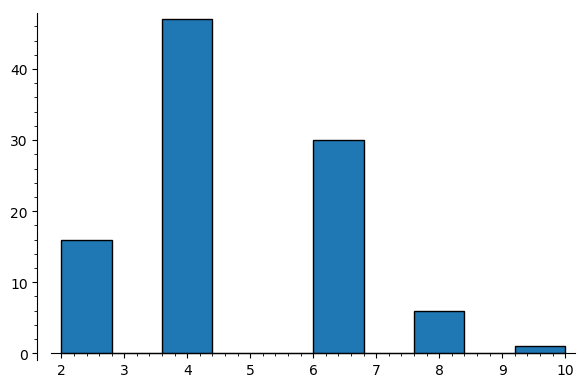

4.58
CPU times: user 594 ms, sys: 3.98 ms, total: 598 ms
Wall time: 598 ms


In [283]:
%%time
s=6
L[s] = sample_number_of_faces(Grid[s], samples=100)

histogram(L[s]).show()
print(exp_size(L[s]))

In [284]:
%%time
s=12
L[s] = sample_number_of_faces(Grid[s], samples=100)

histogram(L[s]).show()
print(exp_size(L[s]))

12.42
CPU times: user 7.46 s, sys: 24 ms, total: 7.48 s
Wall time: 7.5 s


In [1]:
print([3*2^k for k in range(10)])

[3, 6, 12, 24, 48, 96, 192, 384, 768, 1536]


In [12]:
from datetime import datetime

datetime.today().strftime('%Y-%m-%d-%H-%M-%S')

'2020-07-20-20-37-17'

In [2]:
nf = load("list.sobj")
nf_sizes = nf.keys()
enf = {}
print(nf_sizes)

for s in nf_sizes:
    enf[s] = exp_size(nf[s])

#list_plot([log(enf[s])/log(s) for s in nf_sizes])

list_plot([enf[s]/(s^2/20) for s in nf_sizes])+plot(1,0,len(nf_sizes),color="red")

#list_plot([enf[s]/(s*log(s)^2/5) for s in nf_sizes])+plot(1,0,len(nf_sizes),color="red")

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


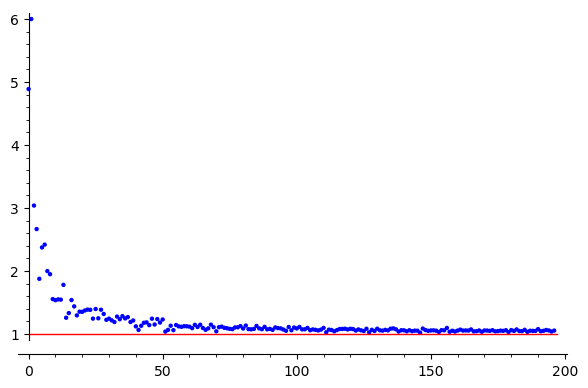

In [3]:
snf = load("short_list.sobj")
snf_sizes = snf.keys()
esnf = {}

for s in snf_sizes:
    esnf[s] = exp_size(snf[s])

#list_plot([log(esnf[s])/log(s) for s in snf_sizes])

list_plot([(esnf[s])/(s^2/20) for s in snf_sizes])+plot(1,0,len(snf_sizes),color="red")

#list_plot([(esnf[s])/(s*log(s)^2/5) for s in snf_sizes])+plot(1,0,len(snf_sizes),color="red")

In [91]:
graphs.RandomTriangulation(7, k=5).show()

In [164]:
def MGG2(n):
    """
        Returns the Margulis–Gabber–Galil graph as defined in 
        https://en.wikipedia.org/wiki/Expander_graph
    """
    Zn = Integers(n)
    V = Zn.cartesian_product(Zn)
    E = []
    for (x,y) in V:
        E += [ ((x,y),(x+2*y,y)), ((x,y),(x-2*y,y)), ((x,y),(x+2*y+1,y)),((x,y),(x-2*y-1,y)),
          ((x,y),(x,y+2*x)), ((x,y),(x,y-2*x)), ((x,y),(x,y+2*x+1)),((x,y),(x,y-2*x-1)) ] 
    return Graph([V,E], format='vertices_and_edges', loops=True, multiedges=True)

In [183]:
def MGG(n):
    """
        Returns the Margulis–Gabber–Galil graph as defined in 
        https://en.wikipedia.org/wiki/Expander_graph
    """
    Zn = Integers(n)
    V = Zn.cartesian_product(Zn)
    E = []
    for (x,y) in V:
        E += [ ((x,y),(x+y,y)), ((x,y),(x-y,y)), ((x,y),(x+y+1,y)),((x,y),(x-y-1,y)),
          ((x,y),(x,y+x)), ((x,y),(x,y-x)), ((x,y),(x,y+x+1)),((x,y),(x,y-x-1)) ] 
    print(V)
    print(E)
    return Graph([V,E], format='vertices_and_edges', loops=True, multiedges=True)

In [4]:
def analyze(filename, guess=None):
    L = load("{}.sobj".format(filename))
    if isinstance(L,tuple):
        L = L[1]
    sizes = L.keys()
    print(sizes)
    ef = {}

    for s in sizes:
        ef[s] = exp_size(L[s])
    if guess is None:
        P=list_plot([ef[s] for s in sizes])
    else:
        P=list_plot([ef[s]/guess(x=s) for s in sizes])+plot(1,0,len(sizes),color="red")
    P.show()

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


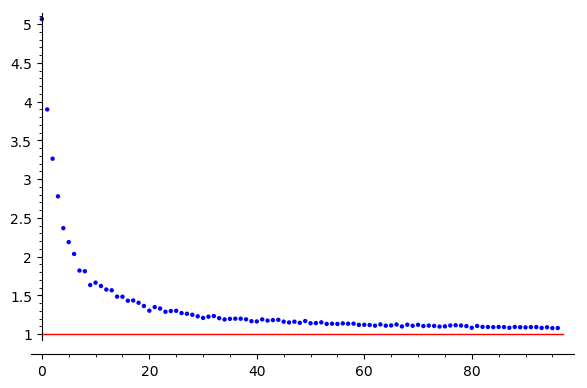

In [5]:
analyze('list', x^2/20)  #grid growing in both dimesions

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])


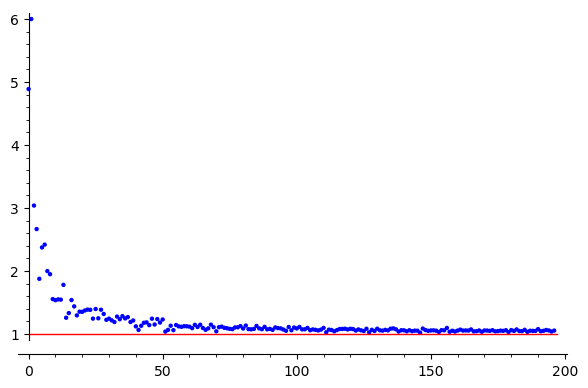

In [6]:
analyze('short_list', x^2/20)  #grid growing in both dimesions

In [7]:
analyze("complete", 2*log(x))

dict_keys([4, 8, 16, 32, 64, 128, 256, 512])


dict_keys([5, 13, 17, 29, 37, 41, 53, 61, 73, 89, 97, 101, 109, 113, 137, 149, 157, 173, 181, 193, 197, 229, 233, 241, 257, 269, 277, 281, 293, 313, 317, 337, 349, 353, 373, 389, 397, 401, 409, 421, 433, 449, 457, 461, 509, 521, 541])


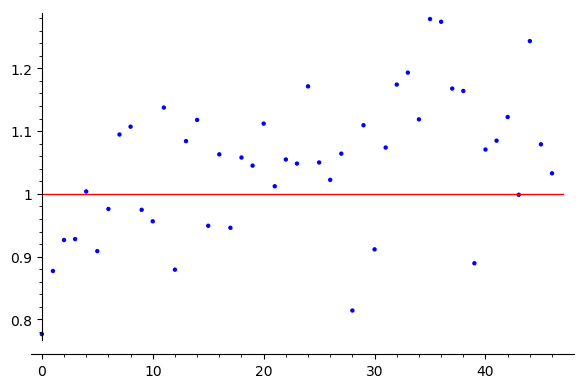

In [8]:
analyze("Paley", 1.6*log(x))

In [9]:
analyze("Random_Cubic", log(x))

dict_keys([16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536])


dict_keys([16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768])


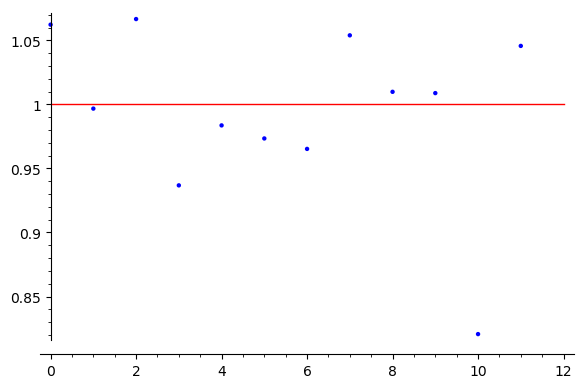

In [10]:
analyze("Random_4reg", 1.1*log(x))

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199])


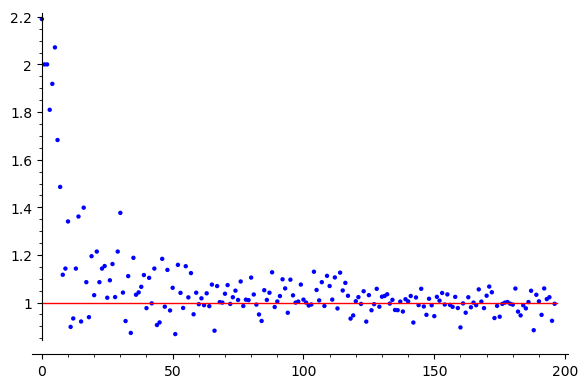

In [11]:
analyze("grid_linear", 0.7*x)

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176])


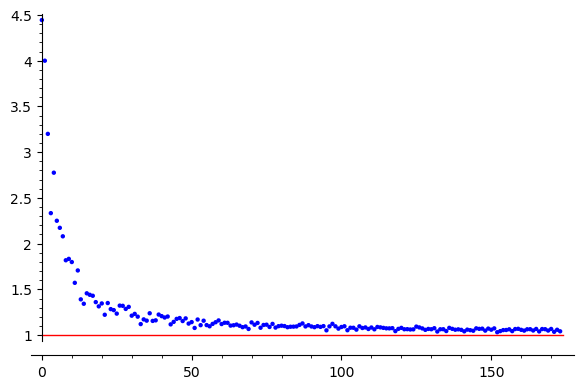

In [12]:
analyze("grid", x^2/20)

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])


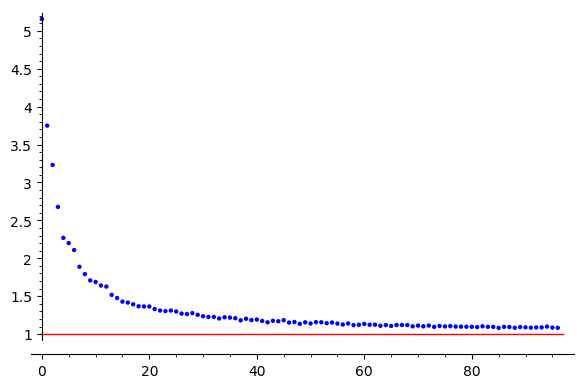

In [13]:
analyze("grid_prec", x^2/20)

In [364]:
%%time
G = graphs.CompleteGraph(100)
S = sample_number_of_faces(G,100)

CPU times: user 21min 12s, sys: 426 ms, total: 21min 12s
Wall time: 21min 13s


In [367]:
statistics.variance(S)/4, statistics.mean(S)/2, statistics.median(S)/2, len(S)

(1.5526262626262626, 4.23, 4.0, 100)

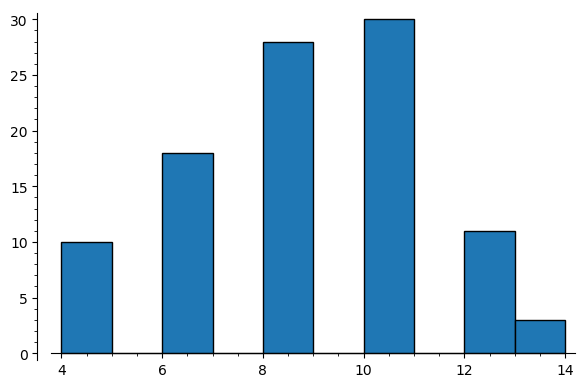

In [368]:
histogram(S)

In [26]:
phi = random_faces(Fl)
phi.cycle_type()
phi

[5, 41, 27, 6, 22, 9, 16, 11, 56, 12, 55, 15, 49, 37, 58, 17, 19, 53, 21, 59, 35, 24, 25, 57, 32, 28, 60, 29, 30, 54, 3, 1, 2, 31, 4, 7, 34, 36, 8, 38, 10, 13, 40, 42, 14, 44, 18, 46, 20, 47, 43, 51, 52, 23, 48, 33, 26, 39, 45, 50]